# <center>  🛳️ **TITANIC - Machine Learning from Disaster** 🧊 </center>

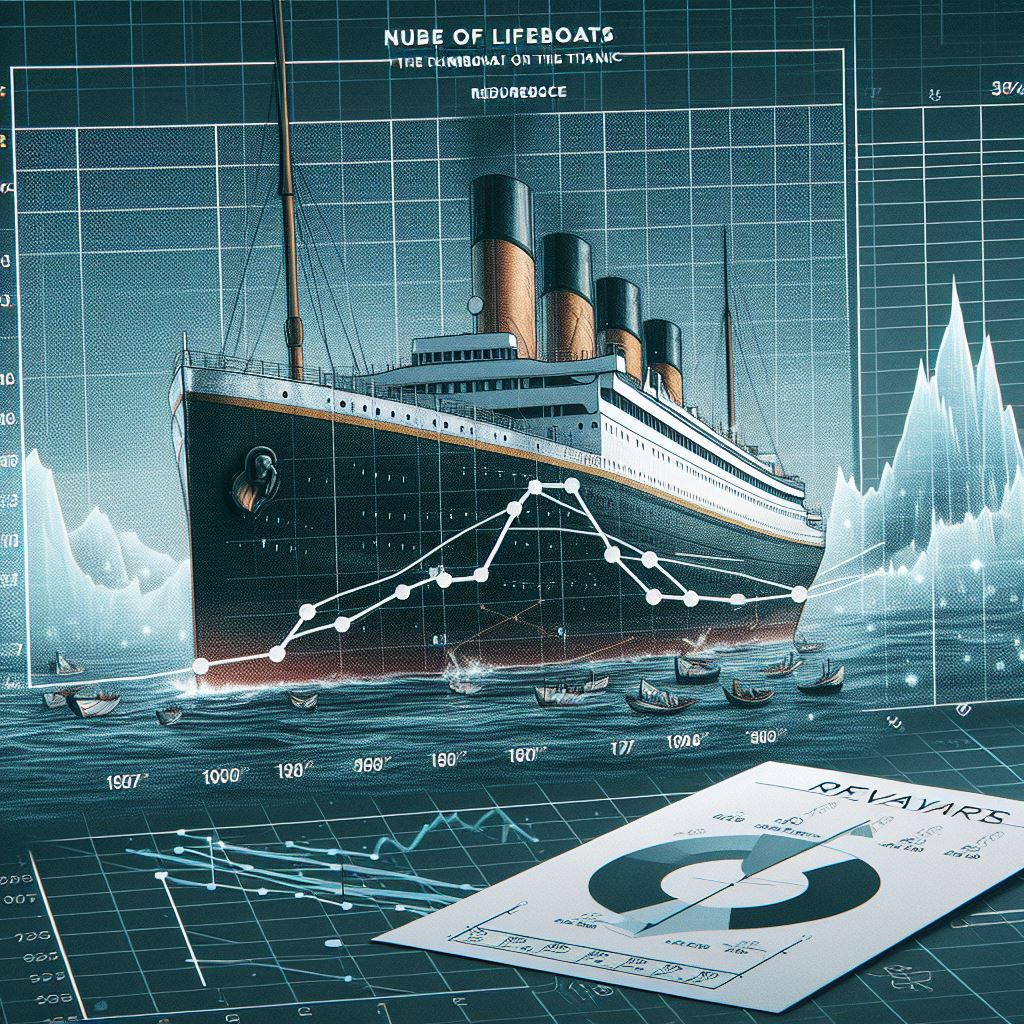

El hundimiento del **Titanic** es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el **RMS Titanic**, ampliamente considerado "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que construya un modelo predictivo que responda a la pregunta: **"¿qué tipo de personas tenían más probabilidades de sobrevivir?"** utilizando datos de pasajeros (es decir, nombre, edad, género, clase socioeconómica, etc.).

# 1.1 🧹 Limpieza de Datos

***Descripción del DataSet***
| Variable | Definición                        | Clave                                          |
|----------|-----------------------------------|------------------------------------------------|
| survival | Supervivencia                     | 0 = No, 1 = Sí                                 |
| pclass   | Clase del billete                  | 1 = 1ra, 2 = 2da, 3 = 3ra                      |
| sex      | Género                            |                                                |
| Age      | Edad en años                      |                                                |
| sibsp    | # de hermanos / cónyuges a bordo  |                                                |
| parch    | # de padres / hijos a bordo       |                                                |
| ticket   | Número de billete                  |                                                |
| fare     | Tarifa del pasajero               |                                                |
| cabin    | Número de cabina                  |                                                |
| embarked | Puerto de embarque                | C = Cherbourg, Q = Queenstown, S = Southampton |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz # Libreria para visualizar estructuras gráficas



ruta = "/Users/carlos/Documents/vsc/DataSciencie/titanic_project/data/raw/train.csv"

data = pd.read_csv(ruta)
data_copy = data.copy()
print(f'row: {data_copy.shape[0]} cols: {data_copy.shape[1]}')
data_copy

row: 891 cols: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Realizar casting a los datos para adecuarlo al análisis
def cast_to_string(dataframe, column_types:dict) -> None:
    """ Make casting to df
        arg: 
            Dataframe: df a modificar
            column_types: dict -> col_name : new_type
    """
    for key, value in column_types.items():
        if key in dataframe.columns: #Comprueba si la columna existe
            dataframe[key] = dataframe[key].astype(value)
            print(f"-> Casting {key} as {value}")
        else:
            print(f"-> Column {key} not found in the DataFrame")

# Definir los tipos de columna deseados
column_types = {'Pclass': 'object',
                'Survived': 'object'
                }

# Aplicar la función para realizar el casting
cast_to_string(data_copy, column_types)

-> Casting Pclass as object
-> Casting Survived as object


Podemos observar que la columna **Age**, contiene información en **blanco /NaN**.

Como el fichero de entramiento es pequeño, voy a sustituir los valores faltantes con la edad média del pasage.

In [4]:
# Remplezamos los datos NaN de Age con la edad media del pasaje
mean_age = data_copy['Age'].mean()
round_age =round(mean_age)
print(f'La media de edad del pasaje es: {round_age}')
print("-"*100)
data_copy['Age'] = data_copy['Age'].fillna(30) # Respeta el tipo de dato original de la columna
data_copy.info()


La media de edad del pasaje es: 30
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


El siguiente problemaque observamos es que no disponemos de toda la información relativa al número de cabina de todos los pasajeros. Considero que esta columna no la vamos a utilizar, por lo tanto la vamos a eliminar. Además, tenemos dos filas sin el puerto de embarque que también vamos a eliminar ya que esa información no es importante para el análisis.

In [5]:
del data_copy['Cabin']
del data_copy['Embarked']
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


# 1.2 🎓 Análisis Exploratorio

- Análisiamos las categorias para cada columna categórica con el objetivo de detectar columnas con una sola categoria que podamos descartar.
- Análizamos la desviación estandar de los datos números a fin de detectar una columna con todos sus valores repetidos.
- Eliminamos las filas repetidas
- Comprobamos la distribución de los datos con un diagrama de acja para detectar puntos verdes o rojos que debamos descartar
- Analizamos las categorias para los datos categórizo con el objeto de ver categorias mal escritas.

In [6]:
# Conteo de los niveles de la clases categróricas
cols_cat = ['Pclass', 'Name', 'Sex', 'Ticket', 'Survived']

for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

data_copy.describe()

Columna Pclass: 3 subniveles
Columna Name: 891 subniveles
Columna Sex: 2 subniveles
Columna Ticket: 681 subniveles
Columna Survived: 2 subniveles


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.758889,0.523008,0.381594,32.204208
std,257.353842,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


La desviación estandar **std** para cada columna numérica es diferente a 0. Esto nos indica que no tenemos columnas con un único valor.

In [7]:
# Eliminación de filas repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (891, 12)
Tamaño del set después de eliminar las filas repetidas: (891, 12)


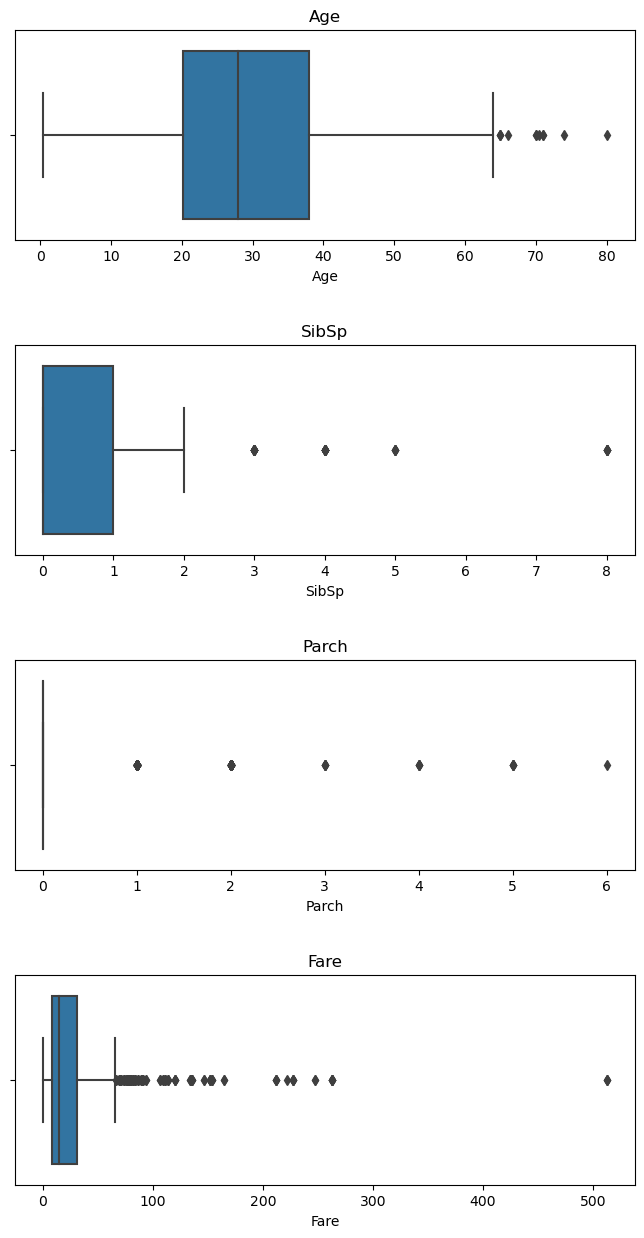

In [8]:
# Generar gráficas individuales pues las variables numéricas con el objeto de analizar los outliers
# están en rangos diferentes
cols_num = ['Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

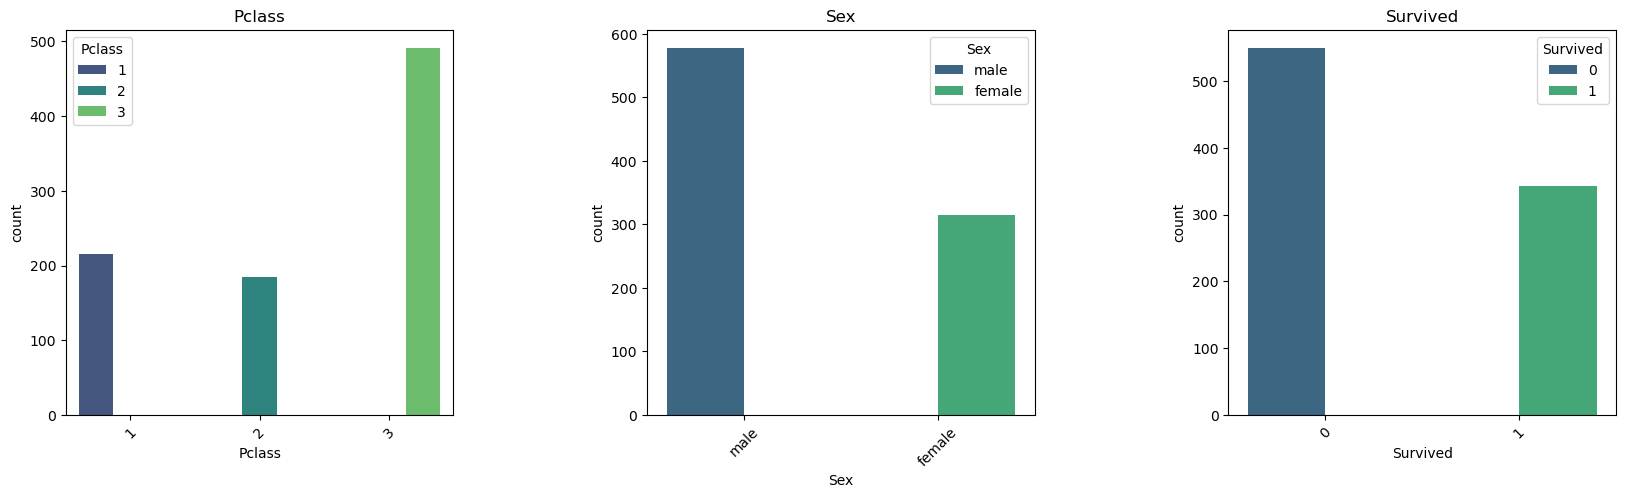

In [9]:
# Conteo de los niveles de la clases categróricas
cols_cat2 = ['Pclass', 'Sex', 'Survived']
# Crea una figura con subgráficos dispuestos en una fila
fig, ax = plt.subplots(1, len(cols_cat2), figsize=(20, 5))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subgráficos

# Itera sobre las columnas categóricas y crea un countplot para cada una
for i, col in enumerate(cols_cat2):
    sns.countplot(x=col, data=data_copy, ax=ax[i], hue=col, palette='viridis')
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=45)

# Muestra la figura completa
plt.show()

## 1.3 Matriz de correlación

La matriz de correlación es un dato tabular que representa las correlaciones entre pares de variables en un dato dado. Cada fila y columna representa una variable, y cada valor de esta matriz es el coeficiente de correlación entre las variables representadas por la fila y columna correspondientes.

La matriz de correlación es una importante métrica de análisis de datos que se calcula para resumir los datos a fin de comprender la relación entre las diversas variables y tomar decisiones en consecuencia.

También es un importante paso de preprocesamiento en aprendizaje automático cuando se desea reducir la dimensionalidad de un dato de alta dimensión.

La interpretación, es sencilla: cada fila representa una variable, y todas las columnas representan las mismas variables que las filas, de ahí el número de filas sea igual que el número de columnas.

El valor de cada casilla representa la correlación entre pares de variables:

* Un valor positivo grande (cercano a 1,0) indica una fuerte correlación positiva, es decir, si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.

* Un valor negativo grande (cercano a -1,0) indica una fuerte correlación negativa, es decir, que el valor de una de las variables disminuye al aumentar el de la otra y viceversa.
* Un valor cercano a 0 (tanto positivo como negativo) indica la ausencia de cualquier correlación entre las dos variables, y por lo tanto esas variables son independientes entre sí.

In [10]:
# Selecciones las columnas numéricas
data_num =data_copy[['Age', 'SibSp', 'Parch', 'Fare']]
data_matrix = data_num.corr()
data_matrix

,Age,SibSp,Parch,Fare
Age,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.232440,1.000000,0.414838,0.159651
Parch,-0.180330,0.414838,1.000000,0.216225
Fare,0.090632,0.159651,0.216225,1.000000


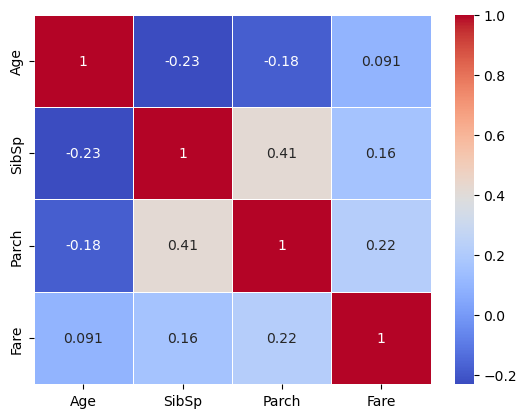

In [11]:
# Mapa de Calor
sns.heatmap(data_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

**Edad (Age):**
- Tiene una correlación positiva débil (0.09) con la tarifa (Fare).
- Tiene una correlación negativa moderada con SibSp (-0.23) y Parch (-0.18). Esto podría indicar que los pasajeros más jóvenes tienden a viajar con menos hermanos/cónyuges (SibSp) y menos padres/hijos (Parch).

**Número de hermanos/cónyuges a bordo (SibSp):**
- Tiene una correlación negativa moderada con la edad (-0.23). Esto podría significar que los pasajeros más jóvenes tienden a tener más hermanos/cónyuges a bordo.
- Tiene correlaciones positivas débiles con Parch (0.41) y Fare (0.16).

**Número de padres/hijos a bordo (Parch):**
- Tiene una correlación negativa moderada con la edad (-0.18). Al igual que con SibSp, esto podría sugerir que los pasajeros más jóvenes tienden a viajar con menos padres/hijos.
- Tiene una correlación positiva moderada con SibSp (0.41) y una correlación débil con Fare (0.22).

**Tarifa (Fare):**
- Tiene una correlación positiva débil con la edad (0.09). Esto podría indicar que las tarifas más altas están ligeramente asociadas con pasajeros más jóvenes.
- Tiene correlaciones positivas débiles con SibSp (0.16) y Parch (0.22).

## 1.4 Tabla de Contingencia

La siguiente tabla de contingencia nos muestra para cada una de las clases el número de supervivientes 1 o fallecidos 0 por sexo
- Podemos ver como de la muestra de 891 individuos, 549 murieron y 343 sobrevivieron.
- Donde encontramos más fallecidos es en los hombres de tercera clase con un total de 300 frente a las 72 mujeres.
- Por otra parte en primera clase es donde hubo menos fallecidos, 77 hombres y 3 mujeres.

In [12]:
cols_cat = ['Pclass', 'Sex', 'Survived']
df_categoricas = data_copy[cols_cat]
contingency_table = pd.pivot_table(df_categoricas, index=['Survived'], columns=['Pclass', 'Sex'], aggfunc= lambda x:len(x), fill_value=0, margins= True)
contingency_table


Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

## 1.5 Algoritmo DecisionTree

El algoritmo requiere varaibles numéricas para ser entrenado.

In [13]:
# Creao una nueva columna llamada Sex_bin la cual contiene el valor 1 para male y 0 para female
# Añadir una nueva columna "Sex_bin" al DataFrame data_copy
data_copy['Sex_bin'] = (data_copy['Sex'] == 'male').astype(int)
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [17]:

# Entrenar
# Separar el DataFrame en features (X) y la variable objetivo (y)
features = ["Pclass", "Age", "Sex_bin", "Parch"]
x_train = data_copy[features]
y_train = data_copy['Survived']
y_train = y_train.astype(int)

# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión y entrenarlo
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
# Realizar predicción sobre conjunto de datos que contienen la etiqueta del resultado
y_pred_test = model.predict(x_test)

# Calcular la precisión en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_test, y_pred_test)
print(f'Precisión en el conjunto de entrenamiento: {accuracy_train}')

# Calcular la matriz de confusión en el conjunto de entrenamiento
conf_matrix_train = confusion_matrix(y_test, y_pred_test)
print('Matriz de confusión en el conjunto de entrenamiento:')
print(conf_matrix_train)

Precisión en el conjunto de entrenamiento: 0.7821229050279329
Matriz de confusión en el conjunto de entrenamiento:
[[88 17]
 [22 52]]


In [19]:
# Exportar el árbol de decisión a un archivo .dot
dot_data = export_graphviz(model, out_file=None, 
                        feature_names=features, 
                        class_names=['Not Survived', 'Survived'],
                        filled=True, rounded=True, special_characters=True) 

# Visualizar el árbol de decisión
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Esto guardará el árbol en un archivo decision_tree.pdf
graph.view("decision_tree")


'decision_tree.pdf'

Aplicamos los resultados del algoritmo a un pasajero no presente en los datos de entrenamiento como Jack Dawson personage interpresato por Leonardo Dicaprio en la película del Titanic

In [21]:
# '"Pclass", "Age", "Sex_bin", "Parch"]
features_pasajero = pd.DataFrame([[3, 23, 1, 0]], columns=["Pclass", "Age", "Sex_bin", "Parch"])  # Jack Dawson - Leonardo Dicaprio Titanic
prediction_pasajero = model.predict(features_pasajero)

# Imprimir la predicción
print(f'Predicción para el pasajero: {prediction_pasajero[0]}') # Resultado cero igual a fallecido


Predicción para el pasajero: 0
